<a href="https://colab.research.google.com/github/rlawogus1115/test/blob/main/1_ML_AtoZ_KNN_lab_ipynb_%EC%86%94%EB%A3%A8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Machine Learning A to Z with KNN</h1>

# module import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import make_classification, load_iris, load_breast_cancer, load_digits
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, classification_report,precision_score, recall_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.model_selection import  train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.model_selection import  cross_val_score, cross_validate
from sklearn.pipeline import Pipeline

In [67]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
git_username = "rlawogus1115"
git_repo = "test"
git_path = "https://"+"@github.com/"+git_username+"/"+git_repo+".git"
print(git_path)

https://@github.com/rlawogus1115/test.git


In [71]:
from os.path import join

proj_path = "/content/drive/MyDrive/"
%cd "{proj_path}"
!git clone https://github.com/rlawogus1115/test.git

/content/drive/MyDrive
Cloning into 'test'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [50]:
!git config --global user.name "rlawogus1115"
!git config --global user.email "rlawogus11115@gmail.com"
!git config --global user.password "rla32415"

In [62]:
%cd /content/drive/MyDrive/Colab Notebooks/test

/content/drive/MyDrive/Colab Notebooks/test


In [63]:
%ls

01.1기초_변수.ipynb


In [64]:
!git status

On branch master
Your branch is based on 'origin/master', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

nothing to commit, working tree clean


In [57]:
!git init
!git add --all

Reinitialized existing Git repository in /content/drive/MyDrive/Colab Notebooks/test/.git/


In [58]:
!git commit -a -m "Added a file to the leetCode folder"

On branch master
Your branch is based on 'origin/master', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

nothing to commit, working tree clean


In [52]:
!git remote add origin https://github.com/rlawogus1115/test.git

fatal: remote origin already exists.


In [53]:
!git push -u origin main

error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/rlawogus1115/test.git'


# KNN 무작위수 분류

## `np.random.randint()`
* `np.random.randint()`로 무작위수 25x2를 생성
* 무작위수를 kNN으로 학습
* 새로운 무작위수 1x2를 만들어서 kNN으로 분류

[1.]


Text(148, 186, 'blue')

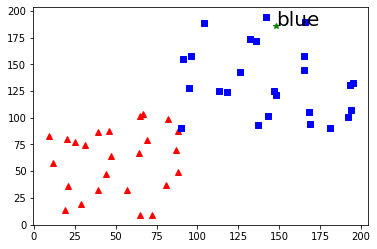

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
import sklearn

np.random.seed(0)
red = np.random.randint(0, 110, (25,2))
blue = np.random.randint(90, 200, (25,2))
X = np.vstack((red, blue)).astype(np.float32)
y = np.zeros(50)
y[25:] = 1 #0:red, 1:blue

X, y = sklearn.utils.shuffle(X, y, random_state=0)

plt.plot(X[y==0,0], X[y==0,1], 'r^')
plt.plot(X[y==1,0], X[y==1,1], 'bs')

newb = np.random.randint(0, 200, (1,2))
plt.plot(newb[:,0], newb[:,1], 'g*')

knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(newb)
print(y_pred)
plt.annotate('red' if y_pred==0 else 'blue', xy=newb[0], xytext=(newb[0]), fontsize=20)

##  `make_classification()`

> 들여쓴 블록


* make_classification() : 분류 모델에 적합한 임의의 데이터 생성 함수
  * n_samples=100 : 표본 데이터 수(건수)
  * n_features=20 : 독립 변수의 수(X 갯수)
  * n_informative=2 : 독립 변수 중 종속 변수와 상관관계가 있는 성분 수
  * n_redundant=2 : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
  * n_repeated=0 : 독립 변수 중 단순 중복된 성분의 수
  * n_classes=2 : 종속 변수의 클래스 수
  * n_clusters_per_class=2: 클래스 당 클러스터의 수
  * weights=None : 클래스 당 표본 수 비율, 예) (0.3, 0.7) 
  * flip_y=0.01 : 클래스가 임의로 교환되는 샘플의 비율, 노이즈 생성 
  * random_state : random seed 

* sklean의 make_classficiation()함수로 변경해서 실습
* `X, y = make_classification(n_samples=50, n_features=2,n_classes=2,  n_redundant=0, random_state=0)`  

[1]


Text(1.764052345967664, 0.4001572083672233, 'blue')

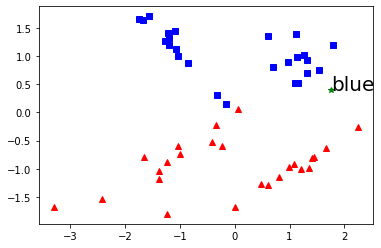

In [ ]:
from sklearn.datasets import make_classification

np.random.seed(0)

X, y = make_classification(n_samples=50, n_features=2, n_classes=2, n_redundant=0, random_state=0)
plt.plot(X[y==0,0], X[y==0,1], 'r^')
plt.plot(X[y==1,0], X[y==1,1], 'bs')

newb = np.random.randn(1,2)
plt.plot(newb[:,0], newb[:,1], 'g*')

knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(newb)
print(y_pred)
plt.annotate('red' if y_pred==0 else 'blue', xy=newb[0], xytext=(newb[0]), fontsize=20)

# Iris 품종 분류


## Iris Raw Data, CSV
* `sns.load_dataset('iris')`
* https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

In [ ]:
!wget -O iris.csv https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

--2022-04-19 01:28:11--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2022-04-19 01:28:11 (50.4 MB/s) - ‘iris.csv’ saved [3858/3858]



In [ ]:
#iris = sns.load_dataset('iris')
iris = pd.read_csv('iris.csv')
iris[::20]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
60,5.0,2.0,3.5,1.0,versicolor
80,5.5,2.4,3.8,1.1,versicolor
100,6.3,3.3,6.0,2.5,virginica
120,6.9,3.2,5.7,2.3,virginica
140,6.7,3.1,5.6,2.4,virginica


# LabelEncoding
* `sklearn.preprocessing.LabelEncoder`
  * `fit()`
  * `transform()`
  * `fit_transfrom()`
  * `inverse_transform()`
  * `classes_`


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(['cat', 'cat', 'dog', 'cow', 'dog'])
print(le.classes_)
label = le.transform(['cat', 'cat', 'dog', 'cow', 'dog'])
print(label)
print(le.inverse_transform(label))

['cat' 'cow' 'dog']
[0 0 2 1 2]
['cat' 'cat' 'dog' 'cow' 'dog']


In [ ]:
le = LabelEncoder()
le.fit(iris['species'])
iris['target'] = le.transform(iris['species'])
print(le.classes_)
iris[::20]

['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
40,5.0,3.5,1.3,0.3,setosa,0
60,5.0,2.0,3.5,1.0,versicolor,1
80,5.5,2.4,3.8,1.1,versicolor,1
100,6.3,3.3,6.0,2.5,virginica,2
120,6.9,3.2,5.7,2.3,virginica,2
140,6.7,3.1,5.6,2.4,virginica,2


# 데이타 분할
* `X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)`

In [ ]:
from sklearn.model_selection import  train_test_split

X = np.arange(10)
y = X * X
print('X:', X, 'y:', y)

X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=0, test_size=0.4, shuffle=False)
print(X_train, X_test, y_train, y_test)



X: [0 1 2 3 4 5 6 7 8 9] y: [ 0  1  4  9 16 25 36 49 64 81]
[0 1 2 3 4 5] [6 7 8 9] [ 0  1  4  9 16 25] [36 49 64 81]


## Iris Raw Data 분류

In [ ]:
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

X_train, X_test, y_train, y_test = train_test_split(iris[feature_names], iris['target'], random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(y_test.values)
print(y_pred)

accuracy = np.sum(y_test == y_pred)/y_test.shape[0]
print('accuracy:', accuracy)

(112, 4) (38, 4) (112,) (38,)
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
accuracy: 0.9736842105263158


# scikit-learn Dataset
* `sklearn.datasets.load_iris()`

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()


acc 0.9736842105263158


* type() 

In [ ]:
type(iris)

sklearn.utils.Bunch

* keys()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

* DESCR

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* feature_names

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* target_names

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

* data

In [ ]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

* data.shape

In [ ]:
iris.data.shape

(150, 4)

* target

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* target.shape

In [ ]:
iris.target.shape

(150,)

* DataFrame으로 생성

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['class'] = iris.target_names[iris.target]
df[::20]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
20,5.4,3.4,1.7,0.2,0,setosa
40,5.0,3.5,1.3,0.3,0,setosa
60,5.0,2.0,3.5,1.0,1,versicolor
80,5.5,2.4,3.8,1.1,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
120,6.9,3.2,5.7,2.3,2,virginica
140,6.7,3.1,5.6,2.4,2,virginica


## Iris KNN 품종 분류 실습

* iris 데이타를 knn으로 train 데이터 학습 
* test 데이터 예측
* test accuracy 계산

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = np.sum(y_pred == y_test)/y_test.shape[0]
print('acc', acc)

acc 0.9736842105263158


In [ ]:
knn.predict_proba(X_test)

array([[0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

# 분류 평가 지표

### 정확도(Accuracy)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)

acc1 = np.sum(y_pred == y_test)/y_test.shape[0]
acc2 = accuracy_score(y_test, y_pred)
acc3 = knn.score(X_test, y_test)

print(acc1, acc2, acc3)

0.9736842105263158 0.9736842105263158 0.9736842105263158


In [ ]:
from sklearn.metrics import confusion_matrix

y_true = np.array([0,1,1,1,1,1,1,1,1,1])
y_pred = np.array([1,0,1,1,1,1,1,1,1,1])

print(f'accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%')

confusion_matrix(y_true, y_pred)

accuracy: 80.00%


array([[0, 1],
       [1, 8]])

In [ ]:
y_true = np.array([1,0,2,0,1,2,0,1,2,0,2,1])
y_pred = np.array([1,0,2,1,2,1,0,1,2,0,1,1])

print(f'accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%')
print(confusion_matrix(y_true, y_pred))

accuracy: 66.67%
[[3 1 0]
 [0 3 1]
 [0 2 2]]


### 정밀도, 재현율

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_true = np.array([0,0,0,0,0,1,1,1,1,1])
y_pred = np.array([0,0,0,0,1,0,1,1,1,1])

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f'accuracy:{accuracy}, precision:{precision}, recall:{recall}')

accuracy:0.8, precision:0.8, recall:0.8


In [ ]:
from sklearn.metrics import f1_score, classification_report

y_true =  [0,0,0,0,0,0,0,0,1,1]
y_pred1 = [0,0,0,0,0,0,1,1,1,1]
y_pred2 = [0,0,0,0,0,0,0,1,0,1]

for y_pred in [y_pred1, y_pred2]:
    print(confusion_matrix(y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'accuracy:{accuracy}, precision:{precision},\
                       recall:{recall}, f1: {f1}')
    print(classification_report(y_true, y_pred))

[[6 2]
 [0 2]]
accuracy:0.8, precision:0.5,                       recall:1.0, f1: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.50      1.00      0.67         2

    accuracy                           0.80        10
   macro avg       0.75      0.88      0.76        10
weighted avg       0.90      0.80      0.82        10

[[7 1]
 [1 1]]
accuracy:0.8, precision:0.5,                       recall:0.5, f1: 0.5
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



## ROC, AUC

auc1: 0.875
auc2: 0.6875
pred1 [0.   0.25 1.  ] [0. 1. 1.] [2 1 0]
pred2 [0.    0.125 1.   ] [0.  0.5 1. ] [2 1 0]


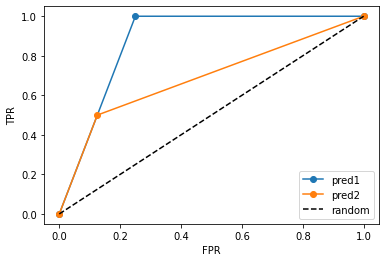

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


y_true =  [0,0,0,0,0,0,0,0,1,1]
y_pred1 = [0,0,0,0,0,0,1,1,1,1]
y_pred2 = [0,0,0,0,0,0,0,1,0,1]

fpr1, tpr1, thresh1 = roc_curve(y_true, y_pred1)
fpr2, tpr2, thresh2 = roc_curve(y_true, y_pred2)

plt.xlabel('FPR'); plt.ylabel('TPR')
plt.plot(fpr1, tpr1, label='pred1', marker='o')
plt.plot(fpr2, tpr2, label='pred2', marker='o')
plt.plot([0,1], [0,1], 'k--', label='random')
plt.legend()

print('auc1:', roc_auc_score(y_true, y_pred1))
print('auc2:', roc_auc_score(y_true, y_pred2))
print('pred1', fpr1, tpr1, thresh1)
print('pred2', fpr2, tpr2, thresh2)

### 유방암 데이터로 ROC 실습
* `load_breast_cancer()`


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
df

In [ ]:
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

acc: 0.9370629370629371
[0.        0.0754717 1.       ] [0.         0.94444444 1.        ] [2 1 0]


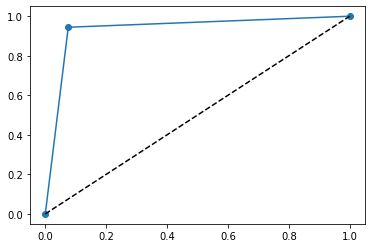

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('acc:', knn.score(X_test, y_test))
fpr, tpr, thresh = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='o')
plt.plot([0,1], 'k--')
print(fpr, tpr, thresh)

### 예측 확률로 ROC 실습
* `knn.predict_proba(X_test)`

In [ ]:
y_proba = knn.predict_proba(X_test)
print(y_proba.shape)
print(y_proba[:5])
print(y_pred[:5])

(143, 2)
[[0.6 0.4]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [0.  1. ]]
[0 1 1 0 1]


### Best Threshold
```python
best_idx = np.argmax(tpr - fpr)
best_thresh = thresh[best_idx]
```

[2.  1.  0.8 0.6 0.4 0.2 0. ]
best thresh: 0.6


Text(0.07547169811320754, 0.9444444444444444, '0.6')

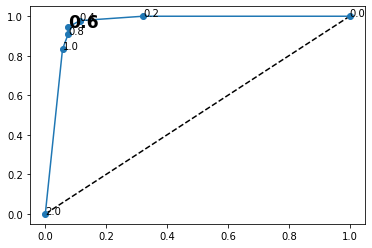

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, y_proba[:, 1])
plt.plot([0,1], 'k--')
plt.plot(fpr, tpr, marker='o')
print(thresh)

best_idx = np.argmax(tpr-fpr)
best_thresh = thresh[best_idx]
print('best thresh:', best_thresh)
for i, t in enumerate(thresh):
  if i!= best_idx:
    plt.annotate(t, xy=(fpr[i], tpr[i]))
plt.annotate(best_thresh, xy=(fpr[best_idx], tpr[best_idx]), fontweight='heavy', fontsize='xx-large')

In [ ]:
y_pred2 = y_proba[:, 1] >= best_thresh
np.all(y_pred2 == y_pred)

True

In [ ]:
accuracy_score(y_test, y_pred2),  accuracy_score(y_test, y_pred)

(0.9370629370629371, 0.9370629370629371)

### Multi-Class ROC

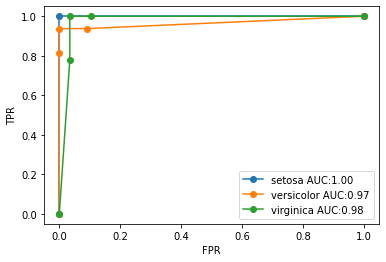

In [ ]:
from sklearn.metrics import auc, roc_curve

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_proba = knn.predict_proba(X_test)

plt.xlabel('FPR');plt.ylabel('TPR')
for i, target_name in enumerate(iris.target_names):
  fpr, tpr, thresh = roc_curve(y_test, y_proba[:, i], pos_label=i)
  score = auc(fpr, tpr)
  plt.plot(fpr, tpr, marker='o', label=f'{target_name} AUC:{score:.2f}')
_ = plt.legend()

# 표준화 정규화

## 임의의 수 표준화 실습
* `[2,8,10]` 
* 표준화 계산
* StandarsScaler 실습

In [ ]:
from sklearn.preprocessing import StandardScaler

arr = np.array([2,8,10], dtype=np.float32).reshape(-1,1)
print(f'mean: {arr.mean()}, var: {arr.var()}, std : {arr.std()}')

print( (arr - arr.mean()) / arr.std())

scaler = StandardScaler()
scaler.fit(arr)
print(scaler.transform(arr))

mean: 6.666666507720947, var: 11.555556297302246, std : 3.399346351623535
[[-1.3728129 ]
 [ 0.39223233]
 [ 0.98058075]]
[[-1.3728129 ]
 [ 0.39223227]
 [ 0.9805806 ]]


In [ ]:
scaler = StandardScaler()
scaler.fit_transform(arr)

array([[-1.3728129 ],
       [ 0.39223227],
       [ 0.9805806 ]], dtype=float32)

In [ ]:
StandardScaler().fit_transform(arr)

array([[-1.3728129 ],
       [ 0.39223227],
       [ 0.9805806 ]], dtype=float32)

## Iris 데이터 표준화 실습
* iris 0,1 feature 표준화 및 시각화

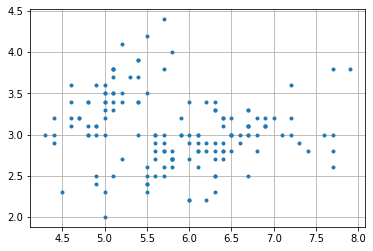

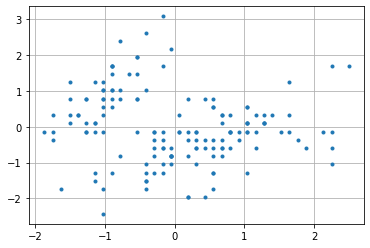

In [ ]:
iris = load_iris()
data = iris.data

plt.plot(data[:, 0], data[:, 1], '.')
plt.grid()
plt.show()

scaled = StandardScaler().fit_transform(data)
plt.plot(scaled[:, 0], scaled[:,1], '.')
plt.grid()
plt.show()

## 표준화의 필요성

* `x = np.load('standard.npy')`
* `y = np.concatenate((np.ones(35), np.zeros(14)))`

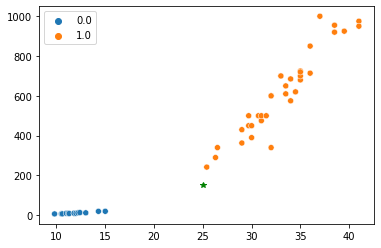

In [ ]:

x = np.array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  11.8,    9.9],
       [  12. ,    9.8],
       [  12.2,   12.2],
       [  12.4,   13.4],
       [  13. ,   12.2],
       [  14.3,   19.7],
       [  15. ,   19.9]])
       
y = np.concatenate((np.ones(35), np.zeros(14)))
newb = np.array([[25, 150]])
 
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.plot(newb[0,0], newb[0,1], 'g*')

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x, y)
acc = knn.score(x, y)
print('acc:', acc)

y_pred = knn.predict(newb)
print('pred:', y_pred)

acc: 1.0
pred: [0.]


In [ ]:
dist, idx = knn.kneighbors(newb)
dist, idx

(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.32150953]]), array([[ 0, 48, 47, 45, 46]]))

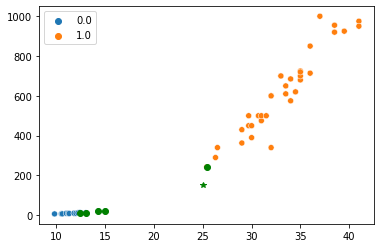

In [ ]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.plot(newb[0,0], newb[0,1], 'g*')
_ = plt.plot(x[idx,0], x[idx,1], 'go')

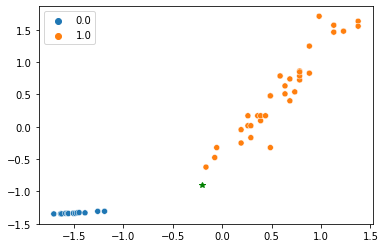

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(x)
x_t = std.transform(x)

sns.scatterplot(x=x_t[:, 0], y=x_t[:, 1], hue=y)
newb_t = std.transform(newb)
plt.plot(newb_t[0,0], newb_t[0,1], 'g*')

In [ ]:
knn2 = KNeighborsClassifier()
knn2.fit(x_t, y)
knn2.predict(newb_t)

array([1.])

## MinMaxScaler

* `[2,8,10]` 
* min max 정규화 계산
* MinMaxScaler 사용

In [ ]:
from sklearn.preprocessing import MinMaxScaler

arr = np.array([2,8,10], dtype=np.float32).reshape(-1,1)
print(f"before:{arr}")

print((arr - np.min(arr)) / (np.max(arr) - np.min(arr)))

scaler = MinMaxScaler()
scaler.fit(arr)
print(scaler.transform(arr))

before:[[ 2.]
 [ 8.]
 [10.]]
[[0.  ]
 [0.75]
 [1.  ]]
[[0.  ]
 [0.75]
 [1.  ]]


* iris 0,1 feature 정규화 및 시각화

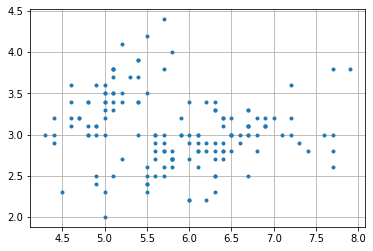

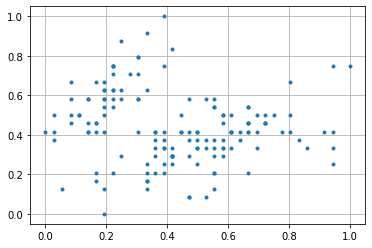

In [ ]:
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
data = iris.data
plt.plot(data[:, 0], data[:, 1], '.')
plt.grid()
plt.show()


scaled = MinMaxScaler().fit_transform(iris.data)
plt.plot(scaled[:, 0], scaled[:, 1], '.')
plt.grid()
plt.show()

## Iris 표준화 후 kNN 분류 실습

* iris 데이터 표준화 후 학습 및 평가

In [ ]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(iris.data)

X_train, X_test, y_train, y_test = train_test_split(X, iris.target, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)
print('acc:', acc)

acc: 0.9736842105263158


## Pipeline
* `sklearn.pipeline.Pipeline`


In [ ]:
from sklearn.pipeline import Pipeline

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
knn = KNeighborsClassifier()
knn.fit(X_train_scale, y_train)

X_test_scale = scaler.transform(X_test)
acc = knn.score(X_test_scale, y_test)
print('acc:', acc)

acc: 0.9736842105263158


In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

scaler = StandardScaler()
knn = KNeighborsClassifier()

pipe = Pipeline([ ('std', scaler), ('knn', knn)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
acc = pipe.score(X_test, y_test)
print('acc:', acc)

acc: 0.9736842105263158


In [ ]:
pipe.steps

[('std', StandardScaler()), ('knn', KNeighborsClassifier())]

In [ ]:
pipe.named_steps

{'knn': KNeighborsClassifier(), 'std': StandardScaler()}

In [ ]:
pipe[1], pipe['knn']

(KNeighborsClassifier(), KNeighborsClassifier())

In [ ]:
pipe.set_params(knn__n_neighbors=1)

Pipeline(steps=[('std', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

# 손글씨 숫자 분류
* `load_digits()`

(1797, 64) 0.0 16.0
(1797, 8, 8)


Text(0.5, 1.0, '0')

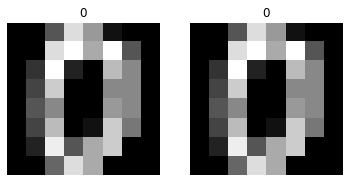

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
#print(digits.DESCR)

print(digits.data.shape, np.min(digits.data), np.max(digits.data))
print(digits.images.shape)

plt.subplot(1,2,1)
plt.imshow(digits.images[0], cmap='gray')
plt.title(digits.target[0])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.title(digits.target[0])

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo


* 첫 번째 숫자만 **표시**

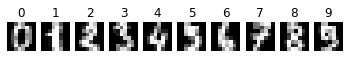

In [ ]:
for i in range(10):
  img = digits.images[i==digits.target][0]
  plt.subplot(1, 10, i+1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title(i)


* 훈련 세트와 테스트 세트 분류
* `n_neighbors`를 1~11로 변경하면서 학습 및 평가

In [ ]:
mm = MinMaxScaler()
X = mm.fit_transform(digits.data)
X_train, X_test, y_train, y_test = train_test_split(X, digits.target,
                                                    random_state=2)

for k in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  acc = knn.score(X_test, y_test)
  print(f'k={k}, accuracy={acc:.2%}')

k=1, accuracy=98.00%
k=2, accuracy=98.44%
k=3, accuracy=98.67%
k=4, accuracy=98.00%
k=5, accuracy=98.00%
k=6, accuracy=97.78%
k=7, accuracy=98.00%
k=8, accuracy=97.33%
k=9, accuracy=96.67%
k=10, accuracy=96.89%
k=11, accuracy=97.11%
k=12, accuracy=96.67%
k=13, accuracy=96.44%
k=14, accuracy=96.22%
k=15, accuracy=96.00%
k=16, accuracy=95.56%
k=17, accuracy=95.78%
k=18, accuracy=95.33%
k=19, accuracy=95.33%


# 교차 검증(Cross Validation)


## KFold
* `np.arange(0.0, 1.5, 0.1)`를 `KFold(3)`으로 분할

In [ ]:
from sklearn.model_selection import KFold

x = np.arange(0.0, 1.5, 0.1)
kfold = KFold(n_splits=3)

for train, test in kfold.split(x):
  print('index:', train, test)
  print('data:', x[train], x[test])

index: [ 5  6  7  8  9 10 11 12 13 14] [0 1 2 3 4]
data: [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4] [0.  0.1 0.2 0.3 0.4]
index: [ 0  1  2  3  4 10 11 12 13 14] [5 6 7 8 9]
data: [0.  0.1 0.2 0.3 0.4 1.  1.1 1.2 1.3 1.4] [0.5 0.6 0.7 0.8 0.9]
index: [0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14]
data: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] [1.  1.1 1.2 1.3 1.4]


* `np.arange(0.0, 1.5, 0.1)`를 KFold(3, shuffle=True)으로 분할
* y는 0,1 비율이 10:5로 생성

In [ ]:
x = np.arange(0.0, 1.5, 0.1)
y = np.zeros(15)
y[10:] = 1
print(x, y)

kfold = KFold(3, shuffle=True)
for train, test in kfold.split(x):
  print(y[train], y[test])


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.] [0. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.] [0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.] [0. 0. 0. 1. 1.]


* `np.arange(0.0, 1.5, 0.1)`를 StratifiedKFold(5, shuffle=True)으로 분할

*   항목 추가
*   항목 추가


* y는 0,1 비율이 10:5로 생성

In [ ]:
from sklearn.model_selection import StratifiedKFold
 
x = np.arange(0.0, 1.5, 0.1)
y = np.zeros(15)
y[10:] = 1

skfold = StratifiedKFold(n_splits=5, shuffle=True)
for train, test in skfold.split(x, y):
  print(y[train], y[test])


[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]


## 손글씨 data KFold(5)로 kNN 학습 및 평가

In [ ]:
digits = load_digits()
kfold = KFold(n_splits=5)

knn = KNeighborsClassifier(n_neighbors=1)
cv_acc = np.array([])

for i, (train_idx, test_idx) in enumerate(kfold.split(digits.data)):
  X_train, X_test = digits.data[train_idx], digits.data[test_idx]
  y_train, y_test = digits.target[train_idx], digits.target[test_idx]
  knn.fit(X_train, y_train)
  acc = knn.score(X_test, y_test)
  cv_acc = np.append(cv_acc, acc)

print('acc scores:', cv_acc)
print('acc mean:', cv_acc.mean())



acc scores: [0.96111111 0.95277778 0.96657382 0.98885794 0.95543175]
acc mean: 0.9649504797276384



## `cross_val_score(estimator, X, y, groups, scoring, cv)`
* scoring : https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, digits.data, digits.target, cv=5)
print(scores)
print(scores.mean())

[0.96111111 0.95277778 0.96657382 0.98607242 0.95543175]
0.9643933766635715


In [ ]:
cross_validate(knn, digits.data, digits.target, cv=5)

{'fit_time': array([0.00172973, 0.00170636, 0.00153518, 0.00173068, 0.00162697]),
 'score_time': array([0.03042889, 0.0328927 , 0.0237062 , 0.02516747, 0.02739525]),
 'test_score': array([0.96111111, 0.95277778, 0.96657382, 0.98607242, 0.95543175])}

In [ ]:
best = (0,0)
for k in range(1, 11):
  knn = KNeighborsClassifier(k)
  scores = cross_val_score(knn, digits.data, digits.target, cv=5)
  print(f'k={k}, mean acc:{scores.mean()}, acc scores:{scores}')
  if best[1] < scores.mean():
    best = (k, scores.mean())
print(f'best k={best[0]}, mean acc:{best[1]}')

k=1, mean acc:0.9643933766635715, acc scores:[0.96111111 0.95277778 0.96657382 0.98607242 0.95543175]
k=2, mean acc:0.9671711544413494, acc scores:[0.96111111 0.96666667 0.96935933 0.97771588 0.96100279]
k=3, mean acc:0.966621788919839, acc scores:[0.95555556 0.95833333 0.96657382 0.98607242 0.96657382]
k=4, mean acc:0.9638409161250386, acc scores:[0.94722222 0.95833333 0.96657382 0.98050139 0.96657382]
k=5, mean acc:0.9627282575054161, acc scores:[0.94722222 0.95555556 0.96657382 0.98050139 0.9637883 ]
k=6, mean acc:0.9593856391210152, acc scores:[0.94444444 0.95833333 0.96657382 0.97493036 0.95264624]
k=7, mean acc:0.9599458372021046, acc scores:[0.93611111 0.96111111 0.96935933 0.98050139 0.95264624]
k=8, mean acc:0.9582760755184154, acc scores:[0.93611111 0.95833333 0.96935933 0.97771588 0.94986072]
k=9, mean acc:0.9566109563602601, acc scores:[0.93055556 0.95277778 0.97214485 0.97771588 0.94986072]
k=10, mean acc:0.954942742185082, acc scores:[0.93055556 0.94722222 0.96935933 0.97

# GridSearchCV

* GridSearchCV, knn으로 최적의 n_neighbors 찾기

In [ ]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
knn = KNeighborsClassifier()

#kfold = KFold(5)
#gcv = GridSearchCV(knn, param_grid={'n_neighbors' : range(1, 11)}, cv=kfold)
gcv = GridSearchCV(knn, param_grid={'n_neighbors' : range(1, 11), 'weights': ['uniform', 'distance']}, cv=5)
gcv.fit(X_train, y_train)
print('best params:', gcv.best_params_)
display(pd.DataFrame(gcv.cv_results_))
best = gcv.best_estimator_
acc = best.score(X_test, y_test)
print('acc:', acc)
print(best)

## Train, Test, Validation Set

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)


## Pipeline + GridSearch
* Minmax Scaler

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
mm_scaler = MinMaxScaler()
knn = KNeighborsClassifier()

pipe = Pipeline([('mm', mm_scaler), ('abc', knn)])
gcv = GridSearchCV(pipe, {'abc__n_neighbors':range(1, 11), 'abc__weights': ['uniform', 'distance']}, cv=5)
gcv.fit(X_train, y_train)
print('best:', gcv.best_params_)
display(pd.DataFrame(gcv.cv_results_))
best = gcv.best_estimator_

best.fit(X_train, y_train)
acc = best.score(X_test, y_test)
print('acc:', acc)


best: {'abc__n_neighbors': 4, 'abc__weights': 'distance'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_abc__n_neighbors,param_abc__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003180,0.000248,0.018939,0.002210,1,uniform,"{'abc__n_neighbors': 1, 'abc__weights': 'unifo...",0.974074,0.985185,0.988848,0.988848,0.985130,0.984417,0.005428,5
1,0.004703,0.002007,0.009362,0.001284,1,distance,"{'abc__n_neighbors': 1, 'abc__weights': 'dista...",0.974074,0.985185,0.988848,0.988848,0.985130,0.984417,0.005428,5
2,0.003363,0.000089,0.020978,0.004255,2,uniform,"{'abc__n_neighbors': 2, 'abc__weights': 'unifo...",0.977778,0.977778,0.985130,0.985130,0.977695,0.980702,0.003616,17
3,0.004575,0.002513,0.009912,0.001117,2,distance,"{'abc__n_neighbors': 2, 'abc__weights': 'dista...",0.974074,0.985185,0.988848,0.988848,0.985130,0.984417,0.005428,5
4,0.003345,0.000160,0.020017,0.000611,3,uniform,"{'abc__n_neighbors': 3, 'abc__weights': 'unifo...",0.985185,0.988889,0.985130,0.985130,0.981413,0.985149,0.002364,3
5,0.003455,0.000303,0.010616,0.000777,3,distance,"{'abc__n_neighbors': 3, 'abc__weights': 'dista...",0.985185,0.992593,0.985130,0.985130,0.981413,0.985890,0.003650,2
6,0.003388,0.000210,0.023450,0.001107,4,uniform,"{'abc__n_neighbors': 4, 'abc__weights': 'unifo...",0.981481,0.992593,0.977695,0.981413,0.977695,0.982175,0.005472,14
7,0.002952,0.000073,0.010932,0.000211,4,distance,"{'abc__n_neighbors': 4, 'abc__weights': 'dista...",0.985185,0.996296,0.981413,0.985130,0.985130,0.986631,0.005045,1
8,0.002965,0.000246,0.022751,0.001824,5,uniform,"{'abc__n_neighbors': 5, 'abc__weights': 'unifo...",0.988889,0.992593,0.973978,0.985130,0.985130,0.985144,0.006232,4
9,0.003116,0.000658,0.011196,0.000468,5,distance,"{'abc__n_neighbors': 5, 'abc__weights': 'dista...",0.988889,0.992593,0.973978,0.985130,0.981413,0.984400,0.006409,8


acc: 0.9866666666666667


In [ ]:
best

Pipeline(steps=[('mm', MinMaxScaler()),
                ('abc',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])

In [ ]:
best[1]

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
best['abc']

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
best[0], best['mm']

(MinMaxScaler(), MinMaxScaler())

# 모델 저장 및 복원

* 최적의 모델 저장
 *  `model.dat`

In [ ]:
import pickle

with open('model.dat', 'wb') as f:
  pickle.dump(best, f)


In [ ]:
with open('model.dat', 'rb') as f:
  model = pickle.load(f)

model.score(X_test, y_test)

0.9866666666666667

### 손으로 쓴 숫자 인식하기
* 온라인 그림판 : https://sketch.io/sketchpad/
* 샘플 숫자 이미지 다운로드 :  0458.png

In [ ]:
!wget -O 0123.png https://share.sketchpad.app/22/119-2adf-18be3b.png

In [ ]:
!wget -O 0123.png https://share.sketchpad.app/21/80b-475f-0c6d78.png

--2022-04-20 00:47:16--  https://share.sketchpad.app/21/80b-475f-0c6d78.png
Resolving share.sketchpad.app (share.sketchpad.app)... 157.245.166.183, 2604:a880:2:d1::c7:1001
Connecting to share.sketchpad.app (share.sketchpad.app)|157.245.166.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84105 (82K) [image/png]
Saving to: ‘0123.png’

0123.png            100%[===================>]  82.13K   518KB/s    in 0.2s    

2022-04-20 00:47:16 (518 KB/s) - ‘0123.png’ saved [84105/84105]



In [ ]:
!wget -O number.png https://share.sketchpad.app/22/879-de70-2a69a7.png

--2022-04-20 00:51:57--  https://share.sketchpad.app/22/879-de70-2a69a7.png
Resolving share.sketchpad.app (share.sketchpad.app)... 157.245.166.183, 2604:a880:2:d1::c7:1001
Connecting to share.sketchpad.app (share.sketchpad.app)|157.245.166.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59149 (58K) [image/png]
Saving to: ‘number.png’

number.png          100%[===================>]  57.76K  --.-KB/s    in 0.1s    

2022-04-20 00:51:57 (409 KB/s) - ‘number.png’ saved [59149/59149]



In [ ]:
!gdown -O 0458.png https://drive.google.com/uc?id=1ljQqEo8VobCOZapC5AZ8k6Zbi_pEbU_4

Downloading...
From: https://drive.google.com/uc?id=1ljQqEo8VobCOZapC5AZ8k6Zbi_pEbU_4
To: /content/0458.png
100% 7.82k/7.82k [00:00<00:00, 7.80MB/s]


*  img2data 모듈 download

In [ ]:
!gdown -O img2data.py https://drive.google.com/uc?id=1f9zt4seoRT3qTDqG-uTAx68j4gvbMN_P

Downloading...
From: https://drive.google.com/uc?id=1f9zt4seoRT3qTDqG-uTAx68j4gvbMN_P
To: /content/img2data.py
100% 2.22k/2.22k [00:00<00:00, 2.68MB/s]


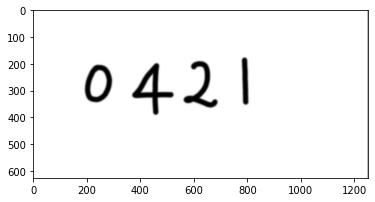

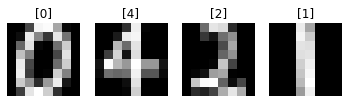

In [ ]:
import img2data

img_path = 'number.png'
image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (8,8), reshape=True)
for i, n in enumerate(numbers):
    n = n/n.max() * 16 # 0~255 구간을 0~16구간으로 변경
    pred = model.predict(n)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(n.reshape(8,8), cmap="gray")
    plt.axis("off")